In [1]:
#Relevant Imports

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#Read CSV

data = pd.read_csv("preprocessed_datasets.csv")

In [3]:
data.head()

,id,PlayerName,DraftAge,Country,country_group,Height,Weight,Position,DraftYear,Overall,...,rs_PIM,rs_PlusMinus,po_GP,po_G,po_A,po_P,po_PIM,sum_7yr_GP,sum_7yr_TOI,GP_greater_than_0
0,9,David Bornhammar,18,Sweden,EURO,73,198,D,1999,192,...,44,0,0,0,0,0,0,0,0,no
1,27,Yared Hagos,18,Sweden,EURO,73,218,C,2001,70,...,24,1,10,4,1,5,4,0,0,no
2,30,Andreas Jamtin,18,Sweden,EURO,72,194,L,2001,157,...,155,2,0,0,0,0,0,0,0,no
3,58,Per Mars,19,Sweden,EURO,75,216,C,2001,87,...,60,-2,5,1,1,2,4,0,0,no
4,67,Daniel Fernholm,19,Sweden,EURO,76,229,D,2002,101,...,12,29,0,0,0,0,0,0,0,no


In [4]:
data.columns

Index([u'id', u'PlayerName', u'DraftAge', u'Country', u'country_group',
       u'Height', u'Weight', u'Position', u'DraftYear', u'Overall',
       u'CSS_rank', u'rs_GP', u'rs_G', u'rs_A', u'rs_P', u'rs_PIM',
       u'rs_PlusMinus', u'po_GP', u'po_G', u'po_A', u'po_P', u'po_PIM',
       u'sum_7yr_GP', u'sum_7yr_TOI', u'GP_greater_than_0'],
      dtype='object')

In [5]:
data = data.drop(['id', 'PlayerName', 'Country'], axis=1)

In [6]:
data.columns

Index([u'DraftAge', u'country_group', u'Height', u'Weight', u'Position',
       u'DraftYear', u'Overall', u'CSS_rank', u'rs_GP', u'rs_G', u'rs_A',
       u'rs_P', u'rs_PIM', u'rs_PlusMinus', u'po_GP', u'po_G', u'po_A',
       u'po_P', u'po_PIM', u'sum_7yr_GP', u'sum_7yr_TOI',
       u'GP_greater_than_0'],
      dtype='object')

In [7]:
#Convert categorical features to continous features

country_group_dictionary = {"CAN" : 0, "EURO" : 1, "USA" : 2}
position_dictionary = {"C" : 0, "D" : 1, "L" : 2, "R" : 3}
data["country_group"] = data["country_group"].map(country_group_dictionary).astype(int)
data["Position"] = data["Position"].map(position_dictionary).astype(int)

In [8]:
#Get feature data

X = data.drop(['GP_greater_than_0'], axis=1)
X = X.values

In [9]:
#Standardize the dataset

X = scale(X)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#Apply PCA to see how many features we need to select

covar_matrix = PCA(n_components = 20) 
covar_matrix.fit(X)

#Calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var

array([ 27.2,  38.6,  49.5,  57.2,  63.7,  69.2,  74. ,  78.6,  82.8,
        86.5,  89.4,  91.8,  93.9,  95.5,  97. ,  98.4,  99.2,  99.9,
       100. , 100. ])

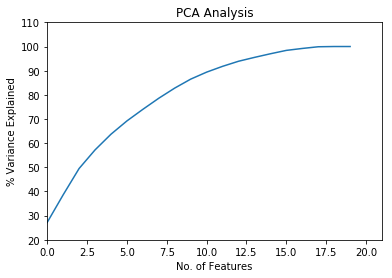

In [11]:
#Plot graph 

plt.ylabel('% Variance Explained')
plt.xlabel('No. of Features')
plt.title('PCA Analysis')
plt.ylim(20,110)
plt.xlim(0,21)
plt.plot(var)